In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 1. Exploratory Data Analysis

## 1.1 Load Data

In [2]:
df0 = pd.read_excel('data-input.xlsx')
df0.info()

In [25]:
df0.describe()

,PER (X),PBV (X),EV/EBTIDA (X),BVPS,ROA,ROE,DER (X),Sales Growth,Operating Income Growth,Net Income Growth,...,Fixed Assets,Total Assets,Current Liabilities,Long Term Debt,Total Liabilities,Total Equity,EPS,Outstanding Shares,Cash From Operating Act,Cash From Investing Act
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,22.537308,3.318654,11.951346,2976.331538,2.286154,-0.056154,1.641538,-13.760385,-51.035192,-393.377692,...,2.897715e+07,7.292258e+07,3.446979e+07,1.301636e+07,4.748615e+07,2.475604e+07,226.181538,18719.980769,6.251000e+06,-4.650168e+06
std,43.877422,7.996354,29.468849,5375.117406,16.023341,37.604398,2.153590,27.763415,242.412491,2168.011493,...,4.610226e+07,2.136870e+08,1.670660e+08,2.013572e+07,1.773333e+08,4.243165e+07,634.551860,27926.638734,1.379256e+07,1.765882e+07
min,-60.350000,0.120000,-68.710000,6.500000,-88.450000,-140.130000,0.080000,-93.950000,-1577.920000,-15358.190000,...,1.174300e+04,1.559900e+04,7.570000e+02,3.200000e+02,1.818000e+03,1.378100e+04,-543.580000,206.000000,-2.373039e+06,-1.160078e+08
25%,4.047500,0.797500,6.290000,321.557500,0.505000,1.305000,0.415000,-27.452500,-45.205000,-76.557500,...,1.265862e+06,4.160043e+06,7.576448e+05,3.627830e+05,1.782152e+06,2.399391e+06,3.947500,2266.250000,1.666752e+05,-1.330188e+06
50%,13.540000,1.300000,8.695000,1189.495000,4.490000,5.945000,1.035000,-11.575000,-19.700000,-24.640000,...,9.687866e+06,1.893220e+07,3.129194e+06,2.556052e+06,6.539200e+06,7.245738e+06,54.050000,6337.000000,1.341656e+06,-3.576365e+05
75%,27.640000,2.730000,18.140000,2378.490000,7.672500,11.382500,1.630000,0.822500,-1.427500,9.647500,...,3.539141e+07,7.805254e+07,1.537184e+07,1.621199e+07,3.486825e+07,2.387414e+07,160.372500,21346.750000,6.200172e+06,-3.830850e+04
max,200.780000,56.790000,147.990000,30415.690000,44.840000,145.090000,10.670000,100.140000,489.530000,492.900000,...,2.058950e+08,1.511805e+09,1.208261e+09,7.008569e+07,1.278346e+09,1.999114e+08,3974.730000,123346.000000,6.668919e+07,1.313300e+07


## 1.2 Data Cleansing

In [3]:
df0.drop(["EMITEN","Minority Interest","Cash From Financing Act","Category"], axis=1, inplace=True)

## 1.3 Scatter Plot

<Figure size 1080x1080 with 0 Axes>

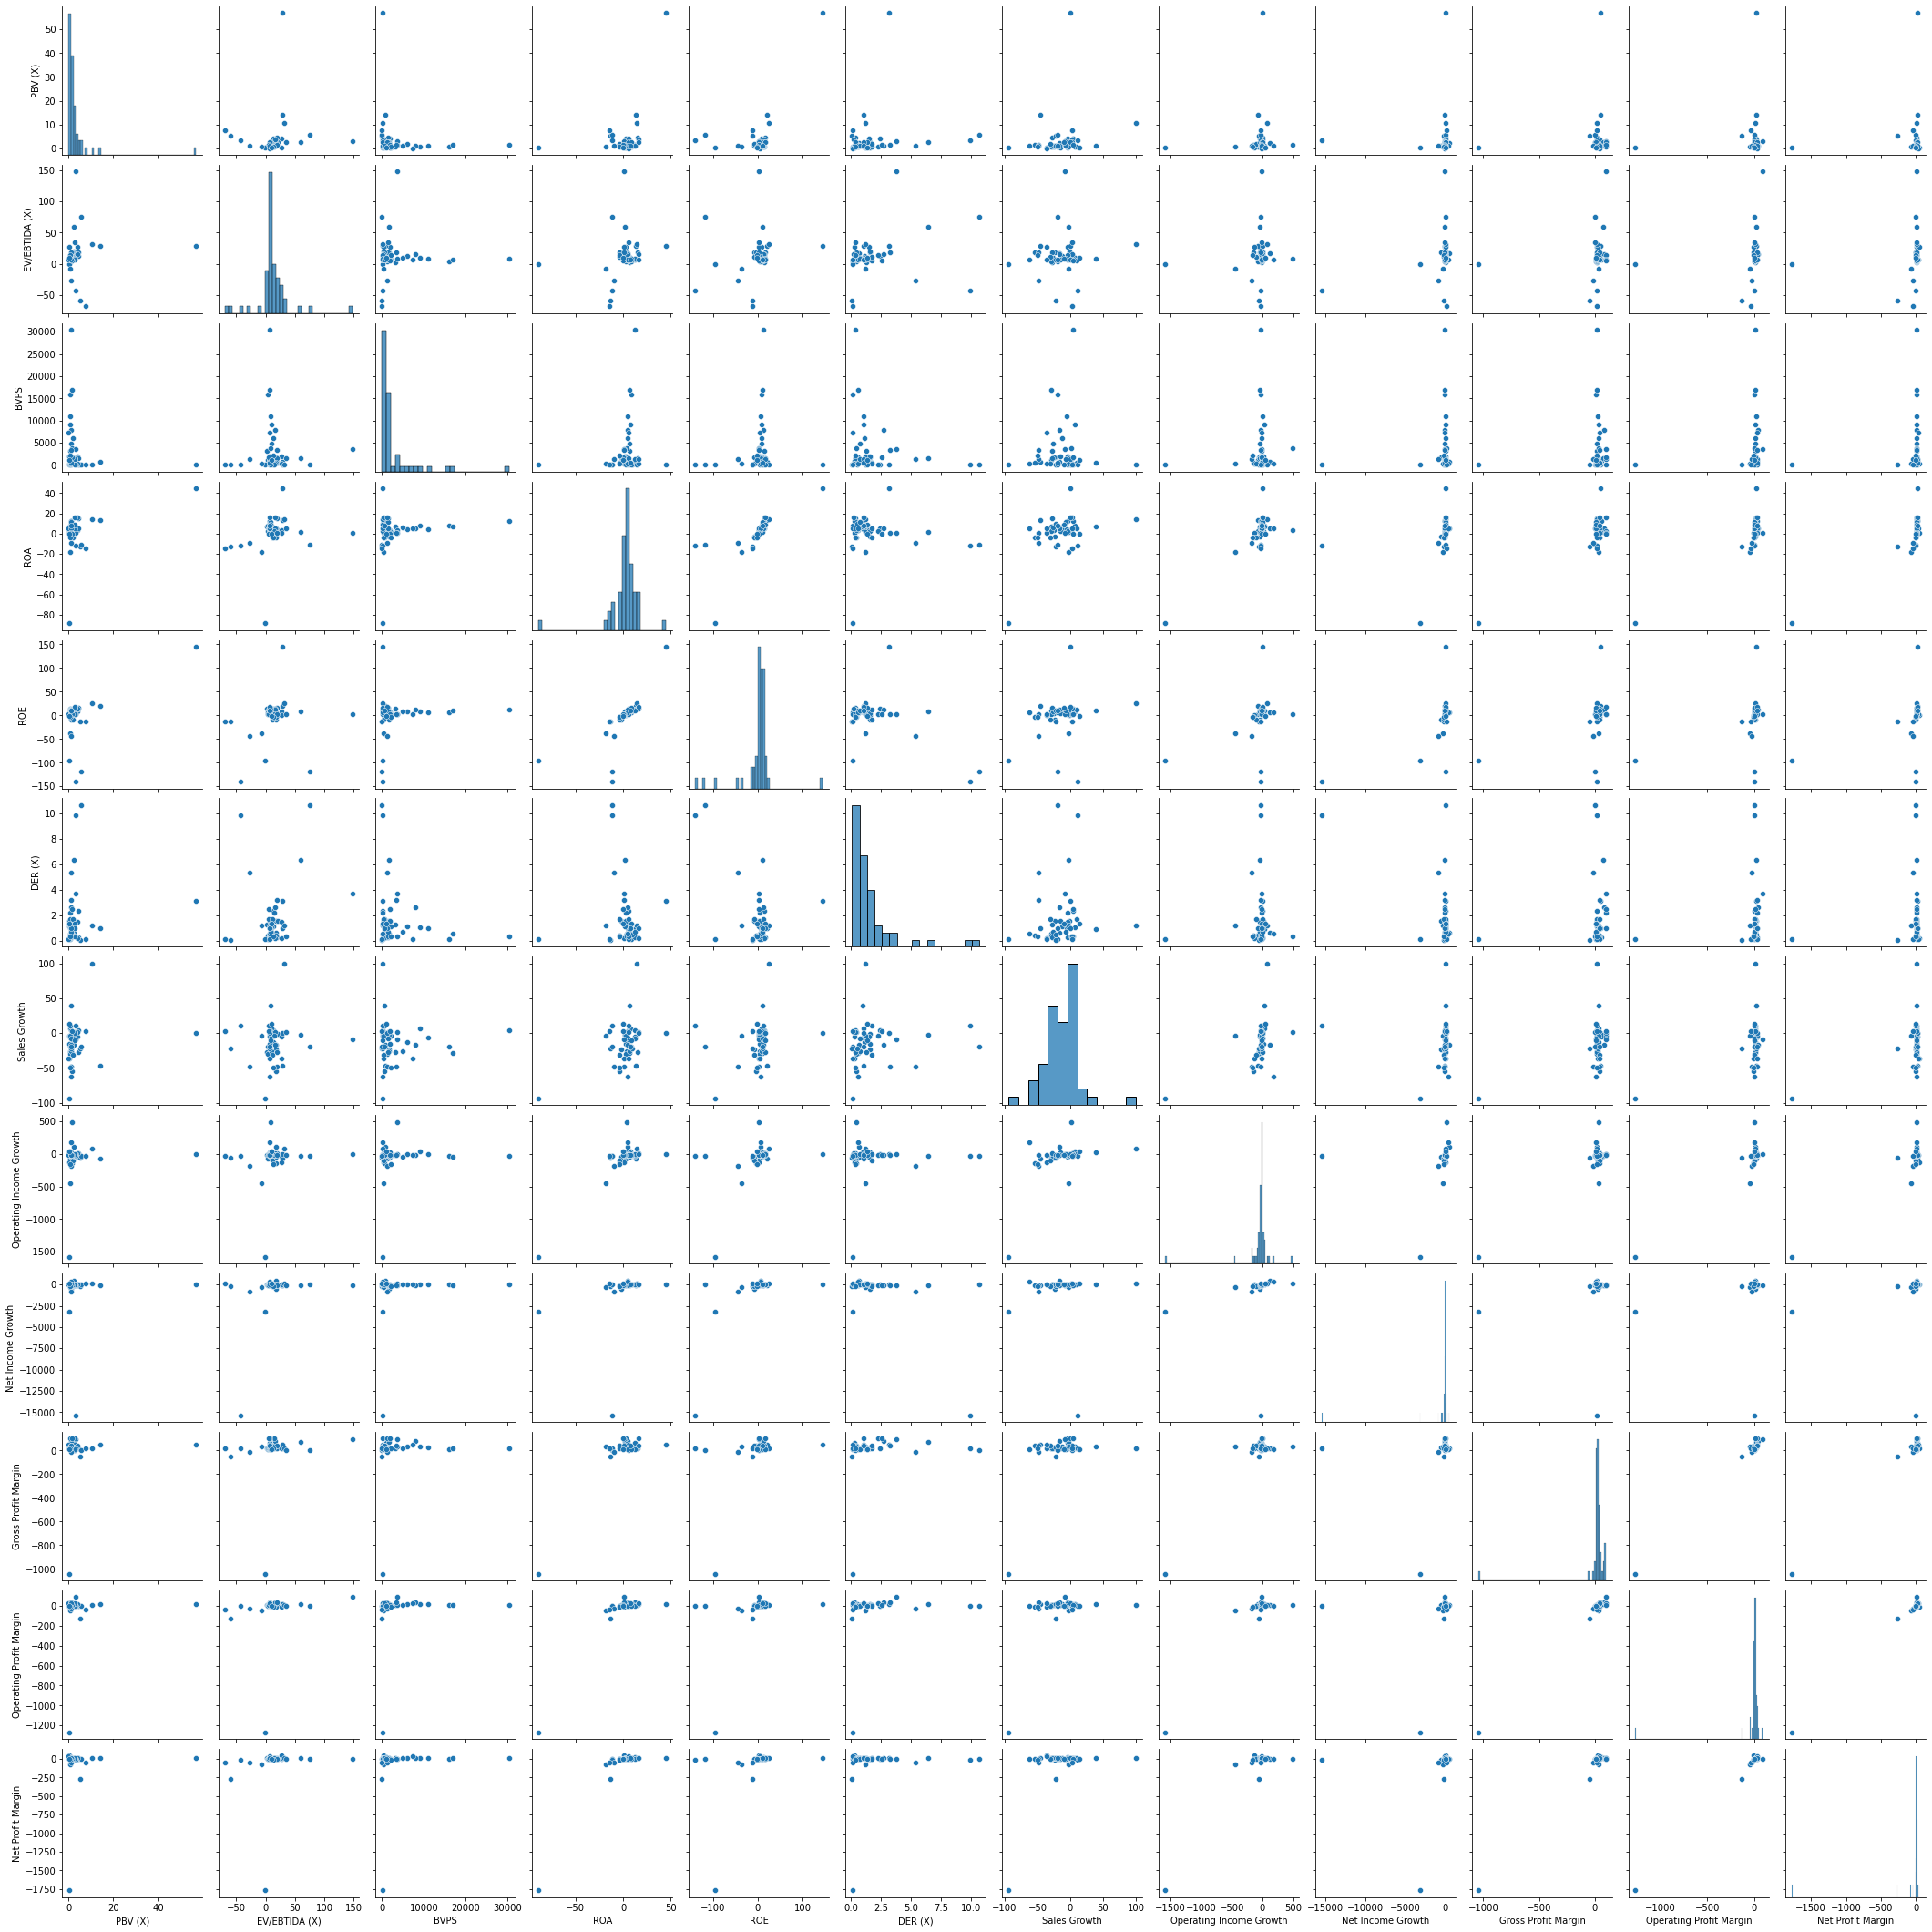

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# 2. Clustering

## 2.1 Load Data

In [95]:
df0 = pd.read_excel('data-input.xlsx')
df1 = df0[['DER (X)','Operating Profit Margin','Sales Growth','Category']]
df1.describe()

,DER (X),Operating Profit Margin,Sales Growth,Category
count,51.000000,51.000000,51.000000,0.0
mean,1.658039,-14.204510,-14.231569,NaN
std,2.165389,179.946534,27.832379,NaN
min,0.130000,-1266.700000,-93.950000,NaN
25%,0.440000,2.435000,-27.465000,NaN
50%,1.030000,9.950000,-12.870000,NaN
75%,1.595000,18.255000,0.390000,NaN
max,10.670000,89.300000,100.140000,NaN


<AxesSubplot:xlabel='Emiten', ylabel='Operating Profit Margin'>

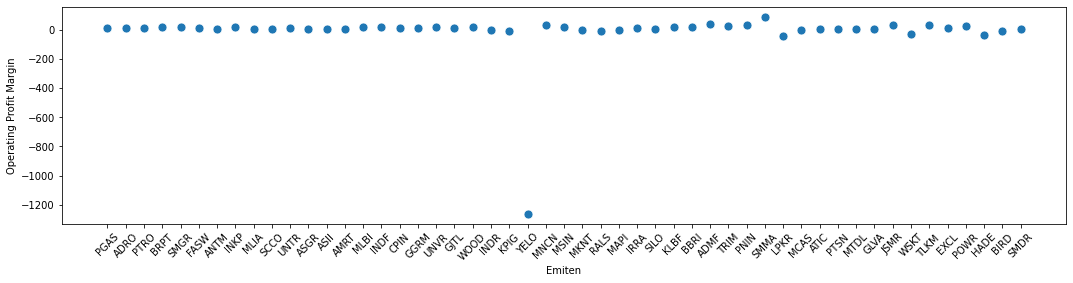

In [96]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='DER (X)'>

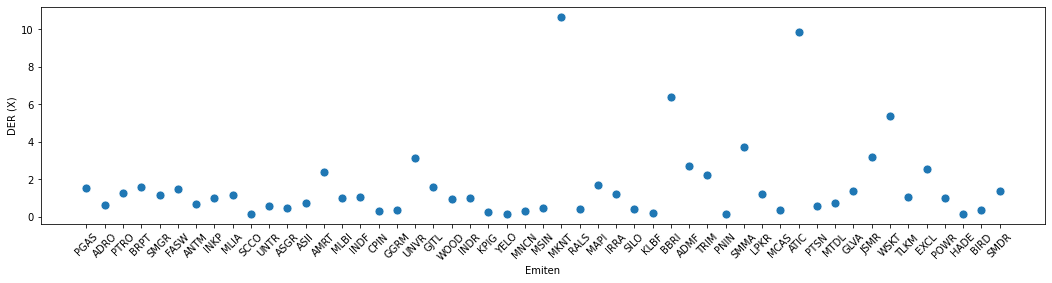

In [97]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='DER (X)', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='Sales Growth'>

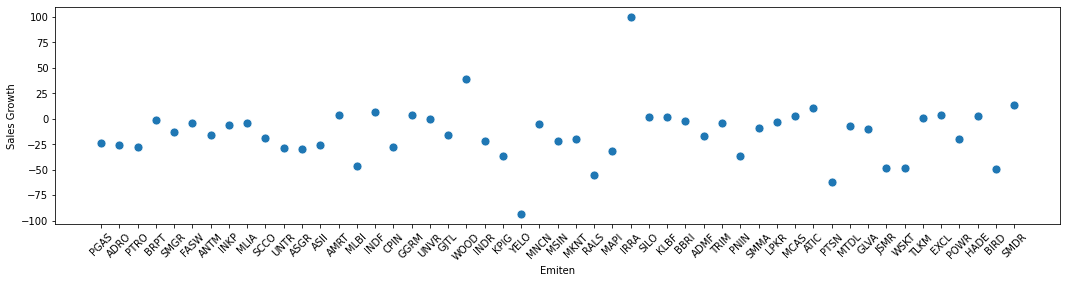

In [98]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='Sales Growth', 
                data=df0, s=80)

## 2.2 Outlier

In [99]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 51
Jumlah baris setelah memfilter outlier: 50


In [100]:
df1.describe()

,DER (X),Operating Profit Margin,Sales Growth,Category
count,50.000000,50.000000,50.000000,0.0
mean,1.688000,10.845400,-12.637200,NaN
std,2.176668,19.648909,25.654668,NaN
min,0.130000,-42.020000,-62.100000,NaN
25%,0.467500,3.000000,-27.127500,NaN
50%,1.035000,10.035000,-11.575000,NaN
75%,1.597500,18.272500,0.525000,NaN
max,10.670000,89.300000,100.140000,NaN


## 2.3 Standardisasi Fitur

In [101]:
feats = ['DER (X)','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER (X),Operating Profit Margin,Sales Growth
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-6.994405e-17,1.998401e-17,5.329071e-17
std,1.010153e+00,1.010153e+00,1.010153e+00
min,-7.230397e-01,-2.717816e+00,-1.947598e+00
25%,-5.664120e-01,-4.033329e-01,-5.705556e-01
50%,-3.030455e-01,-4.166275e-02,4.182412e-02
75%,-4.199942e-02,3.818280e-01,5.182616e-01
max,4.168384e+00,4.033359e+00,4.440602e+00


## 2.4 Lakukan K-means

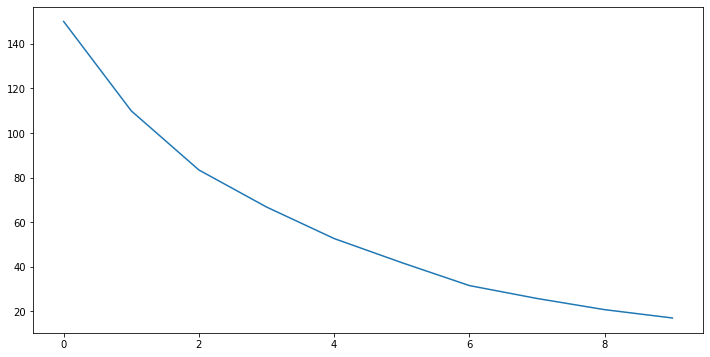

In [102]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)

## 2.5 Pilih Jumlah Cluster

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [104]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

## 2.6 Plot Cluster

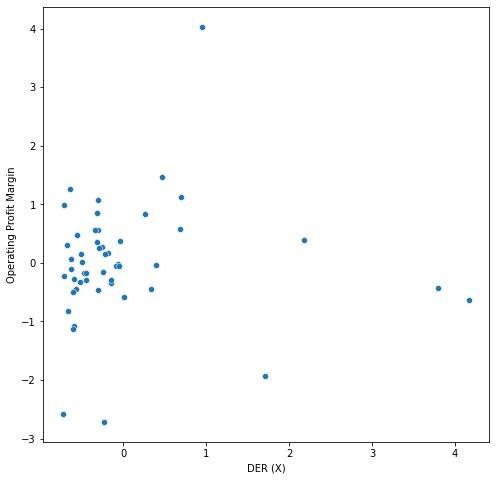

In [105]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER (X)', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [106]:
new_df.head(5)

,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,-0.064043,-0.016215,-0.444654,NaN,4
1,-0.500280,0.020286,-0.510410,NaN,4
2,-0.184705,0.162178,-0.582860,NaN,4
3,-0.040839,0.379129,0.441677,NaN,4
4,-0.254317,0.268597,-0.009166,NaN,4


Assign `fit` to `Category` to create correct colour indicator

In [107]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 3
new_df.loc[new_df['fit'] == 1, 'Category'] = 1
new_df.loc[new_df['fit'] == 2, 'Category'] = 0
new_df.loc[new_df['fit'] == 3, 'Category'] = 4
new_df.loc[new_df['fit'] == 4, 'Category'] = 2
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER (X),Operating Profit Margin,Sales Growth,target,fit
0,2,-0.064043,-0.016215,-0.444654,NaN,4
1,2,-0.500280,0.020286,-0.510410,NaN,4
2,2,-0.184705,0.162178,-0.582860,NaN,4
3,2,-0.040839,0.379129,0.441677,NaN,4
4,2,-0.254317,0.268597,-0.009166,NaN,4


Adjust column name to `(St.)` = Standardized

In [108]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       50 non-null     int32  
 1   DER (St.)                      50 non-null     float64
 2   Operating Profit Margin (St.)  50 non-null     float64
 3   Sales Growth (St.)             50 non-null     float64
dtypes: float64(3), int32(1)
memory usage: 1.5 KB


### 2.6.1 3D Scatter Plot

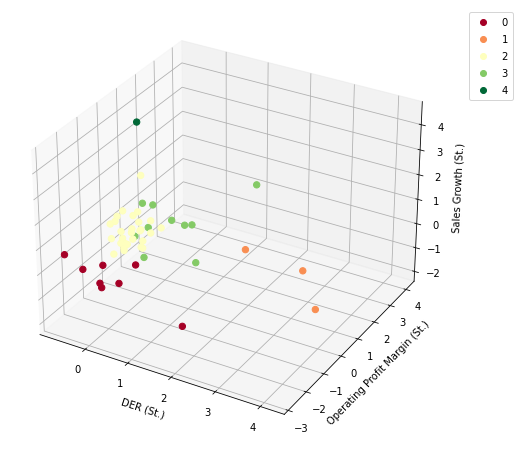

In [109]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 2.6.2 X vs Z View

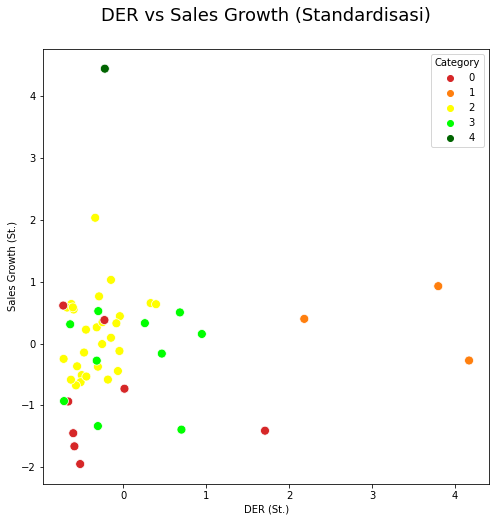

In [110]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.3 Y vs Z View

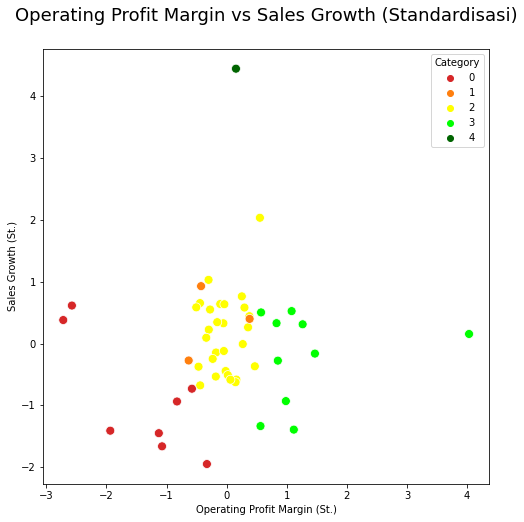

In [111]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

### 2.6.4 X vs Y View

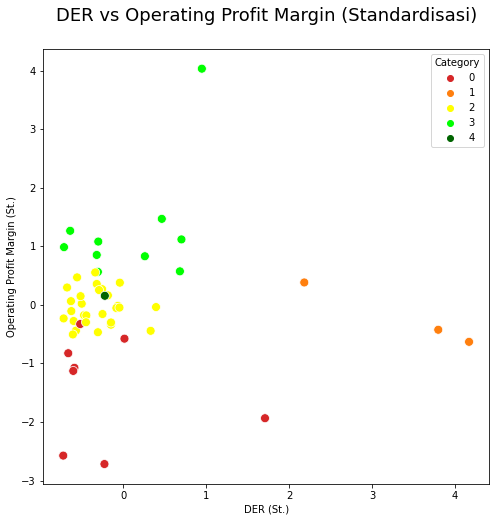

In [112]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3. Export Result

Adjust <b>Initial Data</b> `df0`:<br>
Delete outlier `YELO` and other column other than `Emiten`, `DER`,`Operating Profit Margin`,`Sales Growth`.

In [114]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emiten'] == 'YELO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         "PER (X)",
          "PBV (X)",
          "EV/EBTIDA (X)",
          "BVPS",
          "ROA",
          "ROE",
          "Operating Income Growth",
          "Net Income Growth",
          "Gross Profit Margin",
          "Net Profit Margin",
          "Total Sales",
          "Gross Profit",
          "Operating Profit",
          "Income Before Tax",
          "Net Income",
          "Cash Equivalents",
          "Current Assets",
          "Fixed Assets",
          "Total Assets",
          "Current Liabilities",
          "Long Term Debt",
          "Minority Interest",
          "Total Liabilities",
          "Total Equity",
          "EPS",
          "Outstanding Shares",
          "Cash From Operating Act",
          "Cash From Investing Act",
          "Cash From Financing Act"
         ], axis=1, inplace=True)

Concat <b>Industry Emiten List</b> `dftemp`, <b>Result</b> `new_df` and <b>Initial Data</b> `df0`

In [115]:
dftemp = pd.read_excel('industry-emiten-list.xlsx')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industri,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emiten,DER (X),Sales Growth,Operating Profit Margin
0,Minyak & Gas,Perusahaan Gas Negara Tbk.,2,-0.064043,-0.016215,-0.444654,PGAS,1.55,-23.93,10.53
1,Batu Bara,Adaro Energy Tbk.,2,-0.500280,0.020286,-0.510410,ADRO,0.61,-25.60,11.24
2,"Pendukung Minyak, Gas & Batu Bara",Petrosea Tbk.\n,2,-0.184705,0.162178,-0.582860,PTRO,1.29,-27.44,14.00
3,Barang Kimia,Barito Pacific Tbk.,2,-0.040839,0.379129,0.441677,BRPT,1.60,-1.42,18.22
4,Material Konstruksi,Semen Indonesia (Persero) Tbk.,2,-0.254317,0.268597,-0.009166,SMGR,1.14,-12.87,16.07


In [116]:
df.to_excel('result.xlsx', index = False)

# 4. Get Centroid

In [262]:
kmeans.cluster_centers_

array([[ 0.07796577,  1.27721216, -0.22773712],
       [ 3.3825386 , -0.22442569,  0.35006475],
       [-0.19978728, -1.39490532, -0.89274149],
       [-0.22183117,  0.15549501,  4.44060221],
       [-0.32525515, -0.03911061,  0.14030381]])

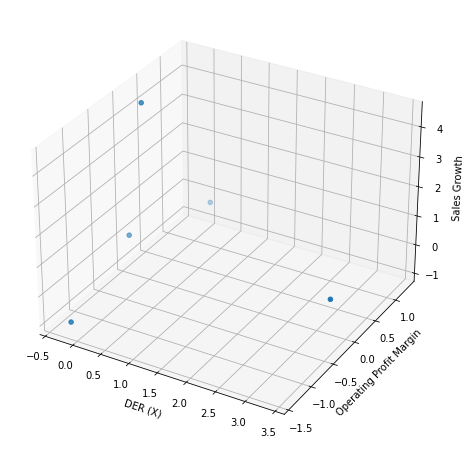

In [284]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# 5. Cluster Description

In [94]:
#Highly Positively Impacted
df[df['Category'] == 4].describe() 

,Category,DER (St.),Sales Growth (St.),Operating Profit Margin (St.),DER (X),Sales Growth,Operating Profit Margin
count,1.0,1.000000,1.000000,1.000000,1.00,1.00,1.00
mean,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87
25%,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87
50%,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87
75%,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87
max,4.0,-0.221831,4.440602,0.155495,1.21,100.14,13.87


In [118]:
#Positively Impacted
df[df['Category'] == 3].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.0,0.077966,1.277212,-0.227737,1.856000,-18.421000,35.689000
std,0.0,0.604116,1.009229,0.739495,1.301744,18.780836,19.630944
min,3.0,-0.713758,0.563691,-1.391623,0.150000,-47.980000,21.810000
25%,3.0,-0.315808,0.836036,-0.767135,1.007500,-32.120000,27.107500
50%,3.0,-0.019956,1.033580,-0.004638,1.645000,-12.755000,30.950000
75%,3.0,0.628599,1.228167,0.324143,3.042500,-4.405000,34.735000
max,3.0,0.947655,4.033359,0.523577,3.730000,0.660000,89.300000


In [119]:
#Neutral Impacted
df[df['Category'] == 2].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.0,-0.325255,-0.039111,0.140304,0.987143,-9.073929,10.084643
std,0.0,0.283918,0.299612,0.627381,0.611785,15.933495,5.827878
min,2.0,-0.718399,-0.505125,-0.676573,0.140000,-29.820000,1.020000
25%,2.0,-0.559451,-0.280591,-0.392088,0.482500,-22.595000,5.387500
50%,2.0,-0.328570,-0.049631,0.158374,0.980000,-8.615000,9.880000
75%,2.0,-0.147578,0.184927,0.581852,1.370000,2.140000,14.442500
max,2.0,0.395398,0.553923,2.031640,2.540000,38.960000,21.620000


In [120]:
#Negatively Impacted
df[df['Category'] == 1].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.0,3.382539,-0.224426,0.350065,8.976667,-3.746667,6.480000
std,0.0,1.056042,0.535818,0.602097,2.275551,15.291345,10.422433
min,1.0,2.182113,-0.631080,-0.274554,6.390000,-19.610000,-1.430000
25%,1.0,2.989616,-0.528002,0.061708,8.130000,-11.070000,0.575000
50%,1.0,3.797118,-0.424925,0.397971,9.870000,-2.530000,2.580000
75%,1.0,3.982751,-0.021099,0.662374,10.270000,4.185000,10.435000
max,1.0,4.168384,0.382728,0.926777,10.670000,10.900000,18.290000


In [121]:
#Highly Negatively Impacted
df[df['Category'] == 0].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER (X),Sales Growth,Operating Profit Margin
count,8.0,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,0.0,-0.199787,-1.394905,-0.892741,1.25750,-35.310000,-16.287500
std,0.0,0.809967,0.905403,0.940636,1.74531,23.889163,17.611391
min,0.0,-0.723040,-2.717816,-1.947598,0.13000,-62.100000,-42.020000
25%,0.0,-0.617461,-2.094982,-1.502168,0.35750,-50.787500,-29.905000
50%,0.0,-0.553650,-1.100968,-1.172895,0.49500,-42.425000,-10.570000
75%,0.0,-0.166141,-0.763332,-0.453120,1.33000,-24.145000,-4.002500
max,0.0,1.708750,-0.327760,0.613352,5.37000,2.940000,4.470000
